In [1]:
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 2.1 MB/s eta 0:00:00


## 성과분석
- 연평균 복리 수익률 (CAGR)
- 최대 낙폭 (MDD)
- 변동성 (Valaility, Vol)
- 샤프 지수 (Sharpe ratio)

In [2]:
import FinanceDataReader as fdr
df = fdr.DataReader('088980', '2014')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2014-01-02,5718,5747,5635,5674,486746,-0.008389
2014-01-03,5673,5728,5645,5684,306943,0.001762
2014-01-06,5710,5710,5618,5703,321558,0.003343
2014-01-07,5700,5710,5654,5684,373719,-0.003332
2014-01-08,5701,5710,5683,5703,237892,0.003343


### 연평균 복리 수익률 (CAGR)

In [6]:
df['cumprod_return'] = (df['Change'] + 1).cumprod() - 1 # 누적수익률 계산
df.head()

,Open,High,Low,Close,Volume,Change,cumprod_return
Date,,,,,,,
2014-01-02,5718,5747,5635,5674,486746,-0.008389,-0.008389
2014-01-03,5673,5728,5645,5684,306943,0.001762,-0.006641
2014-01-06,5710,5710,5618,5703,321558,0.003343,-0.003321
2014-01-07,5700,5710,5654,5684,373719,-0.003332,-0.006641
2014-01-08,5701,5710,5683,5703,237892,0.003343,-0.003321


In [7]:
investment_period = len(df)/252
investment_period

10.615079365079366

In [8]:
last_cumprod_return = df['cumprod_return'].iloc[-1]
last_cumprod_return

1.0010485844110213

In [9]:
CAGR = (last_cumprod_return + 1) ** (1/investment_period) - 1
CAGR

0.06753017162427355

## MDD(Max Draw Down)
- 고점 대비 몇% 소실이 났는지

In [20]:
df['cummax'] = df['Close'].cummax()
df['drawdownratio'] = df['Close'] / df['cummax'] - 1
df['MDD'] = df['drawdownratio'].cummin()
df.head()

,Open,High,Low,Close,Volume,Change,cumprod_return,cummax,drawdownratio,MDD
Date,,,,,,,,,,
2014-01-02,5718,5747,5635,5674,486746,-0.008389,-0.008389,5674,0.000000,0.000000
2014-01-03,5673,5728,5645,5684,306943,0.001762,-0.006641,5684,0.000000,0.000000
2014-01-06,5710,5710,5618,5703,321558,0.003343,-0.003321,5703,0.000000,0.000000
2014-01-07,5700,5710,5654,5684,373719,-0.003332,-0.006641,5703,-0.003332,-0.003332
2014-01-08,5701,5710,5683,5703,237892,0.003343,-0.003321,5703,0.000000,-0.003332


<Axes: xlabel='Date'>

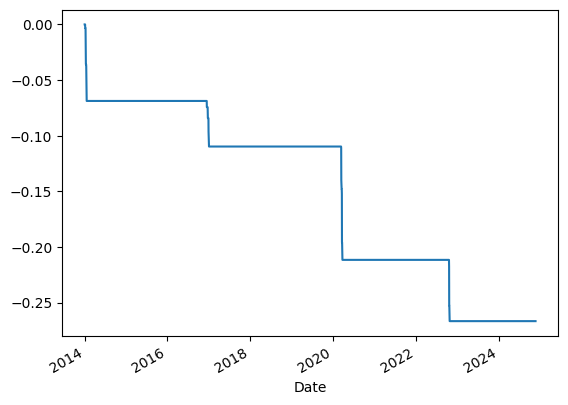

In [21]:
df['MDD'].plot()

### 변동성
- 연 수익률 표준편차

In [27]:
import numpy as np
std = df['Change'].std()
VOL = std * np.sqrt(252)
VOL

0.11491758262005423

In [29]:
# np.sqrt(df['Change'].var() * 252)

### 샤프지수
“샤프비율(Sharp Ratio) = (포트폴리오 기대수익률 – 무위험이자률) / 변동성(리스크)”

높은 샤프지수를 기록하는 투자일수록 더 적은 위험으로 더 높은 수익률을 내는 것
샤프지수가 높은 펀드 혹은 포트폴리오가 더 좋은 포트폴리오라고 볼 수 있다.
기본적으로 샤프지수가 0 이상이어야 투자의 고려대상이 될 수 있고1 이상이면 상당히 괜찮은 투자라고 볼 수 있다.

In [37]:
무위험이자률 = 0.0325

In [38]:
Sharp_Ratio = (CAGR - 무위험이자률) / VOL

In [39]:
CAGR

0.06753017162427355

In [50]:
MDD = df['MDD'].iloc[-1]
print(f'기대수익률 : {CAGR.round(4) * 100}%')
print(f'변동성 : {VOL.round(4) * 100}%')
print(f'MDD : {(MDD* 100).round(4)}%')
print(f'샤프지수 : {Sharp_Ratio.round(2)}')

기대수익률 : 6.75%
변동성 : 11.49%
MDD : -26.67%
샤프지수 : 0.3


In [68]:
import pandas as pd
df = pd.read_csv('제목 없는 스프레드시트 - 시트1 (1).csv', index_col = 0)
df.head()

,맥쿼리인프라,POSCO홀딩스,SK하이닉스,네이버
구분,,,,
기대수익률,6.75,-2.1000,15.55,2.73
변동성,11.49,32.6500,36.13,33.47
MDD,-26.67,-67.4528,-50.39,-65.86
샤프지수,0.30,-0.1600,34.03,-1.55


In [74]:
df2 = df.T.copy()
df2['샤프지수'] = df2['샤프지수'] + abs(df2['샤프지수'].min()) + 1
df2

구분,기대수익률,변동성,MDD,샤프지수
맥쿼리인프라,6.75,11.49,-26.6700,2.85
POSCO홀딩스,-2.10,32.65,-67.4528,2.39
SK하이닉스,15.55,36.13,-50.3900,36.58
네이버,2.73,33.47,-65.8600,1.00


In [81]:
import plotly.express as px
fig = px.scatter(df2, x='변동성', y='기대수익률',
                 size='샤프지수')
fig.show()